### 10.2 MÓDULO THREAD

In [7]:
import threading as tr

def Frase():
    print('Tarefa executada')
    return

t = tr.Thread(target=Frase)
t.start()
t.join()

Tarefa executada


In [8]:
import threading as tr

def Frase(texto):
    print(texto)
    return

t = tr.Thread(target=Frase,args=('Tarefa executada',))
t.start()
t.join()

Tarefa executada


In [9]:
import threading as tr

def Frase(texto):
    print(texto)
    return

for i in range(5):
    t = tr.Thread(target=Frase,args=('Tarefa executada',))
    t.start()
    t.join()

Tarefa executada
Tarefa executada
Tarefa executada
Tarefa executada
Tarefa executada


### 11.3 THREAD EM OPERAÇÕES MATEMÁTICAS

In [10]:
import threading as tr
import numpy as np

def Squad(num):
    s=num*2
    print(s)
    return

k = np.array([1,2,3])
t = tr.Thread(target=Squad,args=(k,))
t.start()
t.join()

[2 4 6]


In [11]:
import threading as tr
import numpy as np

def Squad(num):
    s=num*2
    print(s)
    return

k1 = np.array([1,2,3])
k2 = np.array([5,6,7])

t1 = tr.Thread(target=Squad,args=(k1,))
t2 = tr.Thread(target=Squad,args=(k2,))

t1.start()
t2.start()

t1.join()
t2.join()

[2 4 6]
[10 12 14]


### 11.4 RETORNANDO VALORES CALCULADOS NO THREAD

In [13]:
import threading as tr
import numpy as np

def Squad(num,res):
    s=num*2
    res.append(s)
    return
# programa principal
res=[]
for i in range(5):
    t = tr.Thread(target=Squad,args=(i,res))
    t.start()
    t.join()
    
# impressão do resultado calculado nos processos
print(res)

[0, 2, 4, 6, 8]


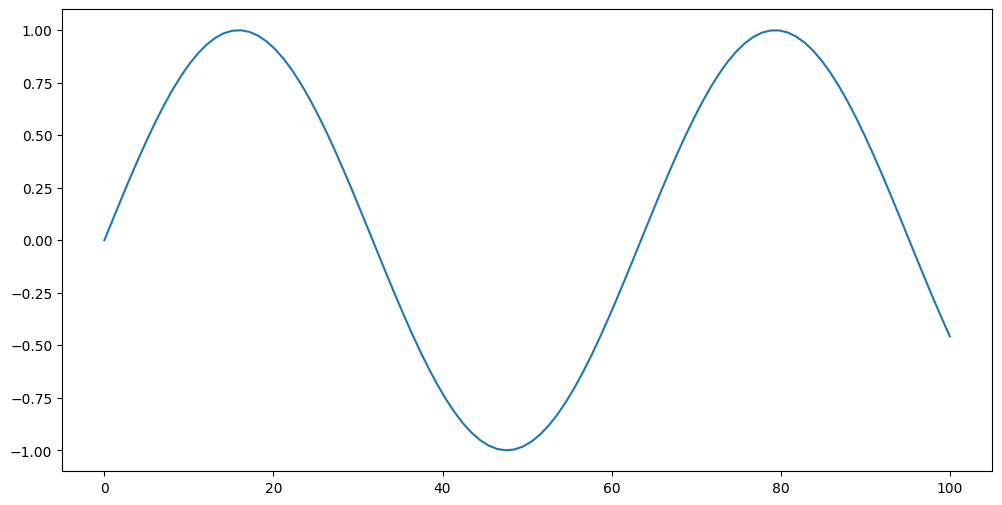

In [14]:
import threading as tr
import matplotlib.pyplot as plt
import numpy as np

def Squad(num,res):
    s=np.sin(num*0.1)
    res.append(s)
    res = np.array(res)
    return

# programa principal
res=[]
for i in range(100):
    t = tr.Thread(target=Squad,args=(i,res))
    t.start()
    t.join()
    
# impressão do resultado calculado nos processos
res = np.array(res)
eixox = np.linspace(0,len(res),len(res))
plt.figure(figsize=(12,6))
plt.plot(eixox,res)

### 11.5 PROCESSOS PARALELOS COM POOL E MAP

In [1]:
import multiprocessing as mp
import numpy as np

def cubo(x):
    return np.sin(x**3)

if __name__ == '__main__':
    k = range(1,7)
    p = mp.Pool()
    res = p.map(cubo,k)
    print(res)
    p.close()

[0.8414709848078965, 0.9893582466233818, 0.956375928404503, 0.9200260381967906, -0.6160404591886565, 0.6960584883449115]


In [2]:
import multiprocessing as mp
import numpy as np

def cubo(x):
    return np.sin(x**3)

if __name__ == '__main__':
    k = range(1,7)
    p = mp.Pool(processes=32)
    res = p.map(cubo,k)
    print(res)
    p.close()

[0.8414709848078965, 0.9893582466233818, 0.956375928404503, 0.9200260381967906, -0.6160404591886565, 0.6960584883449115]


In [5]:
import timeit as tm
code1="""
import multiprocessing as mp
import numpy as np

def cubo(x):
    return np.sin(x**3)

if __name__ == '__main__':
    k = range(1,7)
    p = mp.Pool(processes=32)
    res = p.map(cubo,k)
    print(res)
    p.close()
"""
code2="""
for i in range(1,7):
    x=i**3
"""

code3 = """
import threading as tr
import numpy as np

def cubo(x):
    return np.sin(x**3)

if __name__ == '__main__':
    k = range(1,7)
    t = tr.Thread(target=Squad, args=(k,))
    t.start()
    t.join()
"""
tempo1 = tm.timeit(code1,number=1000000)/1000000
tempo2 = tm.timeit(code2,number=1000000)/1000000
tempo3 = tm.timeit(code3,number=1000000)/1000000

print(tempo1)
print(tempo2)
print(tempo3)

1.9034976050002115e-06
6.2249019850000875e-06
1.8066187339998124e-06


### 11.6 SIMULAÇÃO ESTOCÁSTICA CM PROCESSOS PARALELOS POOL E MAP

0.14052867889404297


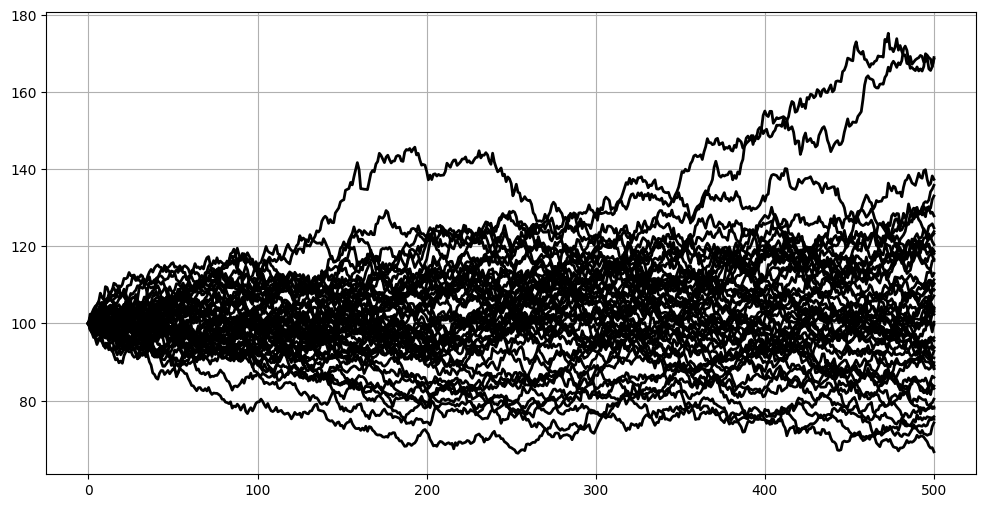

In [9]:
import multiprocessing as mp
import numpy as np
from time import time
import math as mt
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
    
def simul_estoc(x):
    M,I = x
    S0 = 100
    r = 0.05
    sigma = 0.2
    T = 1
    dt = T/M
    y = np.zeros((M+1,I))
    y[0] = S0
    
    for t in range(1,M+1):
        y[t]=y[t-1]*np.exp((r-0.5*sigma**2)*dt+
                           sigma*mt.sqrt(dt)*np.random.standard_normal(I))
    return y

if __name__ == '__main__':
    t0 = time()
    p = mp.Pool(processes=2)
    res = p.map(simul_estoc,((500,50),))
    p.close()
    plt.plot(res[0][:],'-k',linewidth=2)
    plt.grid()
    print(time()-t0)